In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [21]:
df = pd.read_csv('reservations_2021.txt', delimiter= '|', error_bad_lines=False)

C:\Users\gajav\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,11,12,13,18,22,23,27,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [22]:
df.columns

Index(['Property', 'AccountUid', 'Adult', 'Child1', 'Child2', 'HasPet',
       'CreationDateTime', 'StayDate', 'ArrivalDate', 'DepartureDate',
       'CancelNumber', 'CancelDateTime', 'CheckInDateTime', 'CheckOutDateTime',
       'LastUpdateDateTime', 'Status', 'IsLoyaltyMember', 'IsGroup',
       'GroupUid', 'Source', 'SourceCategory1', 'SourceCategory2',
       'SourceCategory3', 'Company', 'IsVolumePlus', 'IsTravelAgency',
       'Rateplan', 'RateplanTier', 'Roomtype', 'Room', 'Tier', 'BookedRate',
       'Nights'],
      dtype='object')

In [23]:
df2 = pd.read_csv('reservations_2021_2.txt', delimiter= '|', error_bad_lines=False)
df2.columns

Index(['Property', 'AccountUid', 'Adult', 'Child1', 'Child2', 'HasPet',
       'CreationDateTime', 'StayDate', 'ArrivalDate', 'DepartureDate',
       'CancelNumber', 'CancelDateTime', 'CheckInDateTime', 'CheckOutDateTime',
       'LastUpdateDateTime', 'Status', 'IsLoyaltyMember', 'IsGroup',
       'GroupUid', 'Source', 'SourceCategory1', 'SourceCategory2',
       'SourceCategory3', 'Company', 'IsVolumePlus', 'IsTravelAgency',
       'Rateplan', 'RateplanTier', 'Roomtype', 'Room', 'Tier', 'BookedRate',
       'Nights'],
      dtype='object')

In [24]:
df = pd.concat([df,df2])

In [25]:
#df = df[(df['Source'] != 'Cancelled')]
df['StayDate'] = pd.to_datetime(df['StayDate']).dt.date
df['CreationDateTime'] = pd.to_datetime(df['CreationDateTime']).dt.date
df['lead_time'] = (df['StayDate'] - df['CreationDateTime']).dt.days
#df = df[df['lead_time'] < 3]

In [27]:
df_imp_col = ['Property','CreationDateTime', 'Nights','BookedRate', 'lead_time']
df = df[df_imp_col]

In [28]:
reservations_agg_2021 = df.groupby(['Property','CreationDateTime'],
                           as_index=False).agg({'Nights':'sum', 'BookedRate':'mean', 'lead_time':'median'})
#agg_data_2021['Revenue'] = agg_data_2021['Nights']*agg_data_2021['BookedRate']
reservations_agg_2021.columns = ['Property', 'BookedDate', 'no_of_bookings', 'BookedRate', 'lead_time']
reservations_agg_2021['Year']=2021
reservations_agg_2021

,Property,BookedDate,no_of_bookings,BookedRate,lead_time,Year
0,HTS1018,2018-10-08,489,0.000000,1058.0,2021
1,HTS1018,2019-01-26,218,42.925780,814.5,2021
2,HTS1018,2019-06-20,119,45.990000,620.0,2021
3,HTS1018,2019-07-28,154,46.990000,599.5,2021
4,HTS1018,2019-08-01,29,41.472759,533.0,2021
...,...,...,...,...,...,...
259395,TRC1210,2021-12-28,38,116.544211,1.0,2021
259396,TRC1210,2021-12-29,43,124.302093,1.0,2021
259397,TRC1210,2021-12-30,44,132.676136,0.0,2021
259398,TRC1210,2021-12-31,21,157.916190,0.0,2021


In [29]:
#reservations_agg_2021['Year']=2021
reservations_agg_2021.to_csv('reservations_agg_2021.csv', index=False)

In [30]:
df = pd.read_csv('reservations_2022.txt', delimiter= '|', error_bad_lines=False)
df['StayDate'] = pd.to_datetime(df['StayDate']).dt.date
df['CreationDateTime'] = pd.to_datetime(df['CreationDateTime']).dt.date
df['lead_time'] = (df['StayDate'] - df['CreationDateTime']).dt.days
df_imp_col = ['Property','CreationDateTime', 'Nights','BookedRate', 'lead_time']
df = df[df_imp_col]
reservations_agg_2019 = df.groupby(['Property','CreationDateTime'],
                           as_index=False).agg({'Nights':'sum', 'BookedRate':'mean', 'lead_time':'median'})
#agg_data_2021['Revenue'] = agg_data_2021['Nights']*agg_data_2021['BookedRate']
reservations_agg_2019.columns = ['Property', 'BookedDate', 'no_of_bookings', 'BookedRate', 'lead_time']
reservations_agg_2019['Year']=2022
reservations_agg_2019.to_csv('reservations_agg_2022.csv', index=False)

In [ ]:
df = pd.read_csv('reservations_2019.txt', delimiter= '|', error_bad_lines=False)
df['StayDate'] = pd.to_datetime(df['StayDate']).dt.date
df['CreationDateTime'] = pd.to_datetime(df['CreationDateTime']).dt.date
df['lead_time'] = (df['StayDate'] - df['CreationDateTime']).dt.days
df_imp_col = ['Property','CreationDateTime', 'Nights','BookedRate', 'lead_time']
df = df[df_imp_col]
reservations_agg_2019 = df.groupby(['Property','CreationDateTime'],
                           as_index=False).agg({'Nights':'sum', 'BookedRate':'mean', 'lead_time':'median'})
#agg_data_2021['Revenue'] = agg_data_2021['Nights']*agg_data_2021['BookedRate']
reservations_agg_2019.columns = ['Property', 'BookedDate', 'no_of_bookings', 'BookedRate', 'lead_time']
reservations_agg_2019['Year']=2019
reservations_agg_2019.to_csv('reservations_agg_2019.csv', index=False)

C:\Users\gajav\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,11,13,18,22,23,27,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [33]:
df = pd.read_csv('reservations_2020.txt', delimiter= '|', error_bad_lines=False)
df['StayDate'] = pd.to_datetime(df['StayDate']).dt.date
df['CreationDateTime'] = pd.to_datetime(df['CreationDateTime']).dt.date
df['lead_time'] = (df['StayDate'] - df['CreationDateTime']).dt.days
df_imp_col = ['Property','CreationDateTime', 'Nights','BookedRate', 'lead_time']
df = df[df_imp_col]
reservations_agg_2019 = df.groupby(['Property','CreationDateTime'],
                           as_index=False).agg({'Nights':'sum', 'BookedRate':'mean', 'lead_time':'median'})
#agg_data_2021['Revenue'] = agg_data_2021['Nights']*agg_data_2021['BookedRate']
reservations_agg_2019.columns = ['Property', 'BookedDate', 'no_of_bookings', 'BookedRate', 'lead_time']
reservations_agg_2019['Year']=2020
reservations_agg_2019.to_csv('reservations_agg_2020.csv', index=False)

C:\Users\gajav\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,11,12,13,18,22,23,27,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [34]:
df_2019 = pd.read_csv('reservations_agg_2019.csv')
df_2020 = pd.read_csv('reservations_agg_2020.csv')
df_2021 = pd.read_csv('reservations_agg_2021.csv')
df_2022 = pd.read_csv('reservations_agg_2022.csv')

In [35]:
df = pd.concat([df_2019,df_2020,df_2021,df_2022])
df.to_csv('reservations1.csv', index=False)

In [47]:
df.head()

,Property,BookedDate,no_of_bookings,BookedRate,lead_time,Year
0,HTS1018,2018-10-06,7406,39.239260,221.0,2019
1,HTS1018,2018-10-08,569,12.688594,207.0,2019
2,HTS1018,2018-10-16,50,42.870000,101.5,2019
3,HTS1018,2018-10-20,31,41.800000,88.0,2019
4,HTS1018,2018-10-29,227,38.256520,177.0,2019


In [66]:
df_check = df[df['Property']=="HTS1018"]
df_check = df_check[['BookedDate','no_of_bookings']]

In [67]:
df_check['BookedDate']=pd.to_datetime(df_check['BookedDate'])
df_check.set_index('BookedDate',inplace=True)

<AxesSubplot:xlabel='BookedDate'>

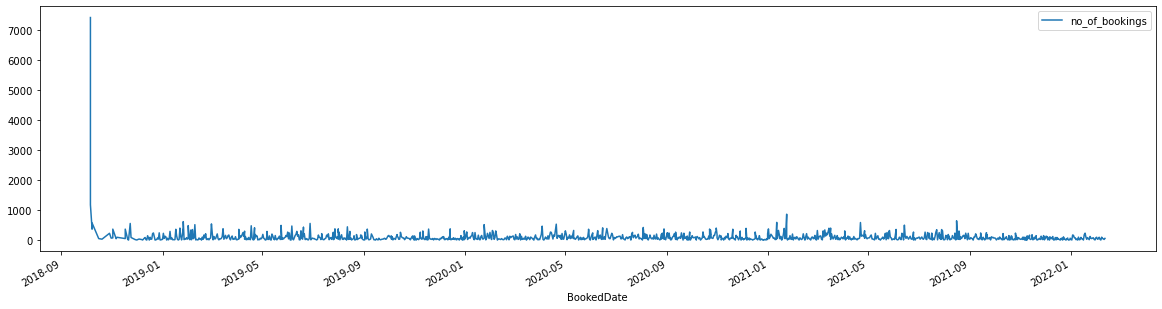

In [68]:
df_check.plot(figsize=(20, 5))

In [71]:
df_check2 = df_check.iloc[1: ,:]

<AxesSubplot:xlabel='BookedDate'>

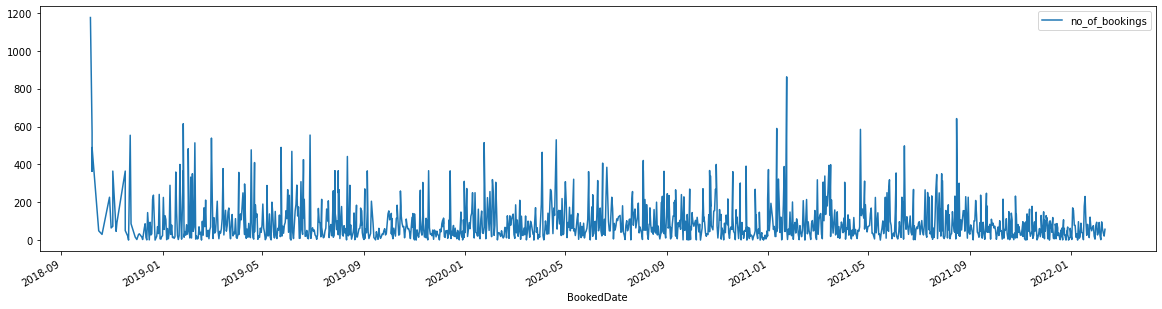

In [72]:
df_check2.plot(figsize=(20, 5))

In [74]:
df = pd.read_csv('reservations_2020.txt', delimiter= '|', error_bad_lines=False)
df['StayDate'] = pd.to_datetime(df['StayDate']).dt.date
df['CreationDateTime'] = pd.to_datetime(df['CreationDateTime']).dt.date
df['lead_time'] = (df['StayDate'] - df['CreationDateTime']).dt.days
df_imp_col = ['Property','StayDate', 'Nights','BookedRate', 'lead_time']
df = df[df_imp_col]
reservations_agg_2020 = df.groupby(['Property','StayDate','lead_time'],
                           as_index=False).agg({'Nights':'sum', 'BookedRate':'mean'})
#agg_data_2021['Revenue'] = agg_data_2021['Nights']*agg_data_2021['BookedRate']
reservations_agg_2020.columns = ['Property', 'BookedDate', 'no_of_bookings', 'BookedRate', 'lead_time']
#reservations_agg_2019['Year']=2020
reservations_agg_2020.head()

,Property,BookedDate,no_of_bookings,BookedRate,lead_time
0,HTS1018,2020-01-01,0,9,44.984444
1,HTS1018,2020-01-01,1,8,46.240000
2,HTS1018,2020-01-01,2,6,47.490000
3,HTS1018,2020-01-01,3,1,39.990000
4,HTS1018,2020-01-01,4,1,47.990000


In [ ]:
reservations_agg_2020_p1 = reservations_agg_2020[reservations_agg_2020['Property']=='']

In [2]:
df = pd.read_csv('reservations_2018.txt', delimiter= '|', error_bad_lines=False)
df['StayDate'] = pd.to_datetime(df['StayDate']).dt.date
df['CreationDateTime'] = pd.to_datetime(df['CreationDateTime']).dt.date
df['lead_time'] = (df['StayDate'] - df['CreationDateTime']).dt.days
df_imp_col = ['Property','CreationDateTime', 'Nights','BookedRate', 'lead_time']
df = df[df_imp_col]
reservations_agg_2019 = df.groupby(['Property','CreationDateTime'],
                           as_index=False).agg({'Nights':'sum', 'BookedRate':'mean', 'lead_time':'median'})
#agg_data_2021['Revenue'] = agg_data_2021['Nights']*agg_data_2021['BookedRate']
reservations_agg_2019.columns = ['Property', 'BookedDate', 'no_of_bookings', 'BookedRate', 'lead_time']
reservations_agg_2019['Year']=2022
reservations_agg_2019.to_csv('reservations_agg_2018.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'reservations_2018.txt'